## Проект "Основы машинного обучения"

**СОДЕРЖАНИЕ ПРОЕКТА**
1. [ОПИСАНИЕ ПРОЕКТА](#describ)


2. [ШАГ 1.ЗАГРУЗКА ДАННЫХ](#part_1)


3. [ШАГ 2.ПРОВЕДЕНИЕ ИССЛЕДОВАТЕЛЬСКОГО АНАЛИЗА ДАННЫХ(EDA)](#part_2)

    [Задача 1. Исследование данных на наличие пропусков, изучение средних значений и стандартных отклонений (применение метода describe()).](#1_1)   
    [Задача 2. Исследование средних значений признаков в двух группах — тех, кто ушел в отток и тех, кто остался (применение метода groupby()).](#1_2)
    [Задача 3. Построение столбчатых гистограмм и распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток).](#1_3)
    [Задача 4. Построение матрицы корреляций ](#1_4)
    
    
4. [ШАГ 3. ПОСТРОЕНИЕ МОДЕЛИ ПРОГНОЗИРОВАНИЯ ОТТОКА КЛИЕНТОВ (построение модели бинарной классификации клиентов, где целевой признак — факт оттока клиента в следующем месяце:)](#part_3)

    [Задача 1. Разбиение данных на обучающую и валидационную выборку функцией train_test_split()](#1)    
    [Задача 2. Обучение модели на train-выборке логистической регрессией.](#2)     
    [Задача 3. Обучение модели на train-выборке случайным лесом.](#3)    
    [Задача 4. Оценка метрики accuracy, precision и recall для обеих моделей на валидационной выборке. Сравнение по ним моделей. Выбор лучшей.](#4)
    
    
5. [ШАГ 4. КЛАСТЕРИЗАЦИЯ КЛИЕНТОВ](#part_4) 

    [Задача 1. Стандартизация данных.](#5)    
    [Задача 2. Построение матрицы расстояний функцией linkage() на стандартизованной матрице признаков и отрисовка дендрограммы.](#6)    
    [Задача 3. Обучение модели кластеризации на основании алгоритма K-Means и прогнозирование кластеров клиентов.](#7)    
    [Задача 4. Изучение средних значений признаков для кластеров. Можно ли сразу что-то заметить?](#8)    
    [Задача 5. Построение распределений признаков для кластеров. Можно ли что-то заметить по ним?](#9)   
    [Задача 6. Для каждого полученного кластера расчет доли оттока (методом groupby()). Отличаются ли они по доле оттока? Какие кластеры склонны к оттоку, а какие — надёжны?](#10)    
    
   
6. [ШАГ 5. ВЫВОДЫ И БАЗОВЫЕ РЕКОМЕНДАЦИИ ПО РАБОТЕ С КЛИЕНТАМИ](#part_5)

**Описание проекта:** <a id="describ"></a> 
*Сеть фитнес-центров «Культурист-датасаентист» разрабатывает стратегию взаимодействия с клиентами на основе аналитических данных. Распространённая проблема фитнес-клубов и других сервисов — отток клиентов. Как понять, что клиент больше не с вами? Можно записать в отток тех, кто попросил закрыть договор или удалил аккаунт. Однако клиенты не всегда уходят демонстративно: чаще перестают пользоваться сервисом тихо. Индикаторы оттока зависят от специфики отрасли. Когда пользователь редко, но стабильно закупается в интернет-магазине — не похоже, что он «отвалился». А вот если две недели не заходит на канал с ежедневно обновляемым контентом, дела плохи: подписчик заскучал и, кажется, оставил вас. Для фитнес-центра можно считать, что клиент попал в отток, если за последний месяц ни разу не посетил спортзал. Конечно, не исключено, что он уехал на Бали и по приезде обязательно продолжит ходить на фитнес. Однако чаще бывает наоборот. Если клиент начал новую жизнь с понедельника, немного походил в спортзал, а потом пропал — скорее всего, он не вернётся. Чтобы бороться с оттоком, отдел по работе с клиентами «Культуриста-датасаентиста» перевёл в электронный вид множество клиентских анкет.* 

**Цель исследования:** *провести анализ и подготовить план действий по удержанию клиентов:*.

**Задачи исследования:**
* научиться прогнозировать вероятность оттока (на уровне следующего месяца) для каждого клиента;
* сформировать типичные портреты клиентов: выделить несколько наиболее ярких групп и охарактеризовать их основные свойства;
* проанализировать основные признаки, наиболее сильно влияющие на отток;
* сформулировать основные выводы и разработать рекомендации по повышению качества работы с клиентами: 
* 1) выделить целевые группы клиентов;
* 2) предложить меры по снижению оттока;
* 3) определить другие особенности взаимодействия с клиентами.

**Структура данных:** 

**Данные клиента за предыдущий до проверки факта оттока месяц:**

* 'gender' — пол;
* 'Near_Location' — проживание или работа в районе, где находится фитнес-центр;
* 'Partner' — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент — в таком случае фитнес-центр хранит информацию о работодателе клиента);
* Promo_friends — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента);
* 'Phone' — наличие контактного телефона;
* 'Age' — возраст;
* 'Lifetime' — время с момента первого обращения в фитнес-центр (в месяцах).

**Информация на основе журнала посещений, покупок и информация о текущем статусе абонемента клиента:**

* 'Contract_period' — длительность текущего действующего абонемента (месяц, 6 месяцев, год);
* 'Month_to_end_contract' — срок до окончания текущего действующего абонемента (в месяцах);
* 'Group_visits' — факт посещения групповых занятий;
* 'Avg_class_frequency_total' — средняя частота посещений в неделю за все время с начала действия абонемента;
* 'Avg_class_frequency_current_month' — средняя частота посещений в неделю за предыдущий месяц;
* 'Avg_additional_charges_total' — суммарная выручка от других услуг фитнес-центра: кафе, спорттовары, косметический и массажный салон.
* 'Churn' — факт оттока в текущем месяце.

### ШАГ 1. ЗАГРУЗКА ДАННЫХ
<a id="part_1"></a> 

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
gym = pd.read_csv('/datasets/gym_churn.csv')
print(gym.shape)
display(gym.head(5))

(4000, 14)


,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


**Размер датасета 4000 строк на 14 столбцов**

In [3]:
gym.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

**Пустых значений в датасете нет, все ячейки заполнены. Можно привести названия столбцов к нижнему регистру, а также проверить можно ли поменять тип  у столбца "Month_to_end_contract"**	

In [4]:
gym.columns = gym.columns.str.lower()
print(gym.columns)

Index(['gender', 'near_location', 'partner', 'promo_friends', 'phone',
       'contract_period', 'group_visits', 'age',
       'avg_additional_charges_total', 'month_to_end_contract', 'lifetime',
       'avg_class_frequency_total', 'avg_class_frequency_current_month',
       'churn'],
      dtype='object')


In [5]:
# выведем все значения столбца 'month_to_end_contract'
print(gym['month_to_end_contract'].value_counts()) 

1.0     2207
6.0      645
12.0     524
11.0     181
5.0      130
10.0      82
9.0       73
4.0       58
8.0       38
7.0       25
3.0       23
2.0       14
Name: month_to_end_contract, dtype: int64


In [6]:
# изменим тип столбца 'month_to_end_contract' на int
gym['month_to_end_contract'] = gym['month_to_end_contract'].astype(int)
gym.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   near_location                      4000 non-null   int64  
 2   partner                            4000 non-null   int64  
 3   promo_friends                      4000 non-null   int64  
 4   phone                              4000 non-null   int64  
 5   contract_period                    4000 non-null   int64  
 6   group_visits                       4000 non-null   int64  
 7   age                                4000 non-null   int64  
 8   avg_additional_charges_total       4000 non-null   float64
 9   month_to_end_contract              4000 non-null   int64  
 10  lifetime                           4000 non-null   int64  
 11  avg_class_frequency_total          4000 non-null   float

**ВЫВОД:** пустых значений в датасете нет, все ячейки заполнены. Можно привести названия столбцов к нижнему регистру, а также проверить можно ли поменять тип у столбца "Month_to_end_contract"

### ШАГ 2.ПРОВЕДЕНИЕ ИССЛЕДОВАТЕЛЬСКОГО АНАЛИЗА ДАННЫХ (EDA) 
<a id="part_2"></a> 

#### Задача 1. Исследование данных на наличие пропусков, изучение средних значений и стандартных отклонений (применение метода describe()).  
<a id="1_1"></a> 

In [7]:
# исследуем данные на дубликаты
gym.duplicated().sum()

0

**дубликатов нет**

In [8]:
# с помощью метода describe выведем характеристики, дающие представление о выборке в целом
display(gym.describe())

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


**Среднее значение и медиана отличаются незначительно, что говорит о небольшом количестве выбросов.**

#### Задача 2. Исследование средних значений признаков в двух группах — тех, кто ушел в отток и тех, кто остался (применение метода groupby()).
<a id="1_2"></a> 

In [9]:
gym_grouped = gym.groupby(['churn']).mean()
display(gym_grouped)

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


**В процессе исследования среднего значения признаков в двух группах (0-остался, 1-ушел) было выявлено их влияние на исход события: "ушел/остался": средние значения признаков 'gender', 'near_location', 'phone', 'age', 'avg_additional_charges_total' приблизительно равны, а следовательно данные признаки не имеют влияния на исход события. Что касается признаков 'partner', 'promo_friends', 'group_visits', 'avg_class_frequency_total' они имеют среднюю степень положительного влияния на клиентов (промо акции положительно влияют на заинтересованность клиентов, групповые визиты положительно влияют на социализацию и настроение клиетов, средняя посещаемость говорит о заинтересованности клиентов в занятиях). Наибольшее влияние на исход события оказывают признаки: 'contract_period', 'month_to_end_contract', 'lifetime', 'avg_class_frequency_current_month' - временные показатели (период действия абонемента, время до окончания абонемента, время с момента первого обращения, частота посещений за последний месяц - это все говорит также о заинтересованности клиентов в фитнес-услугах).**

#### Задача 3. Построение столбчатых гистограмм и распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток).
<a id="1_3"></a> 

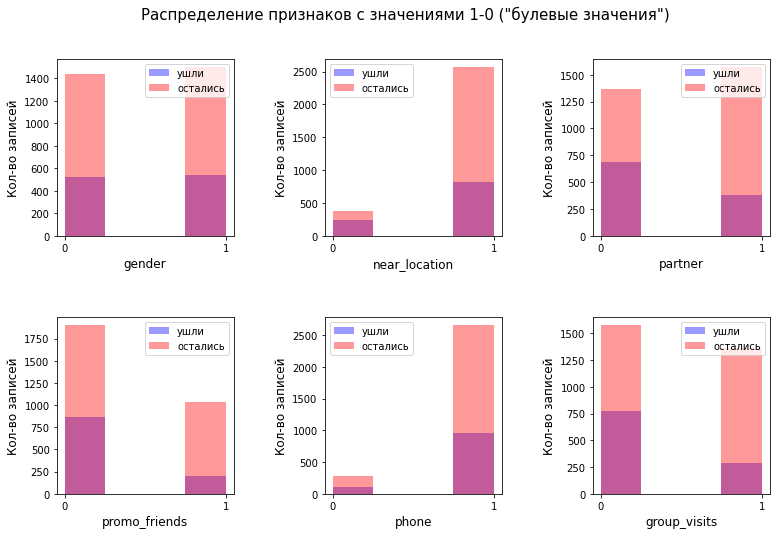

In [10]:
features = ['gender', 'near_location', 'partner', 'promo_friends', 'phone', 'group_visits']
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12,8))
axes_list = [item for sublist in axes for item in sublist]
fig.tight_layout(pad=6.0)
fig.suptitle('Распределение признаков с значениями 1-0 ("булевые значения")', fontsize=15)
for i in features:
    ax = axes_list.pop(0)
    sns.distplot(gym.query('churn == 1')[i].astype(int), bins=4, ax=ax, kde=False, color='b',label='ушли')
    sns.distplot(gym.query('churn == 0')[i].astype(int), bins=4, ax=ax, kde=False, color='r',label='остались')
    ax.set_xticks([0,1])
    ax.set_xlabel(i, fontsize=12)
    ax.set_ylabel('Кол-во записей', fontsize=12)
    ax.legend()
plt.show()

**1. Распределение мужчин и женщин в датасете равное, также это распределение сохранилось и в группах (при этом и мужчин и женщин осталось в три раза больше, чем ушло); 2. Тех, кто живет ближе значительно больше, доля оставшихся при этом еще больше; 3. оставшихся среди участвовавших в партнерской программе больше; 4. участников промо-акции меньше, а вот доля оставшихся выше, чем среди неучаствовавших в акции. 5. оставивших телефон больше, но распределение долей ушел/остался среди оставивших и неоставивших телефон примерно одинаковое; 6. Среди тех, кто ходил на групповые занятия доля, тех кто хочет остаться выше.**

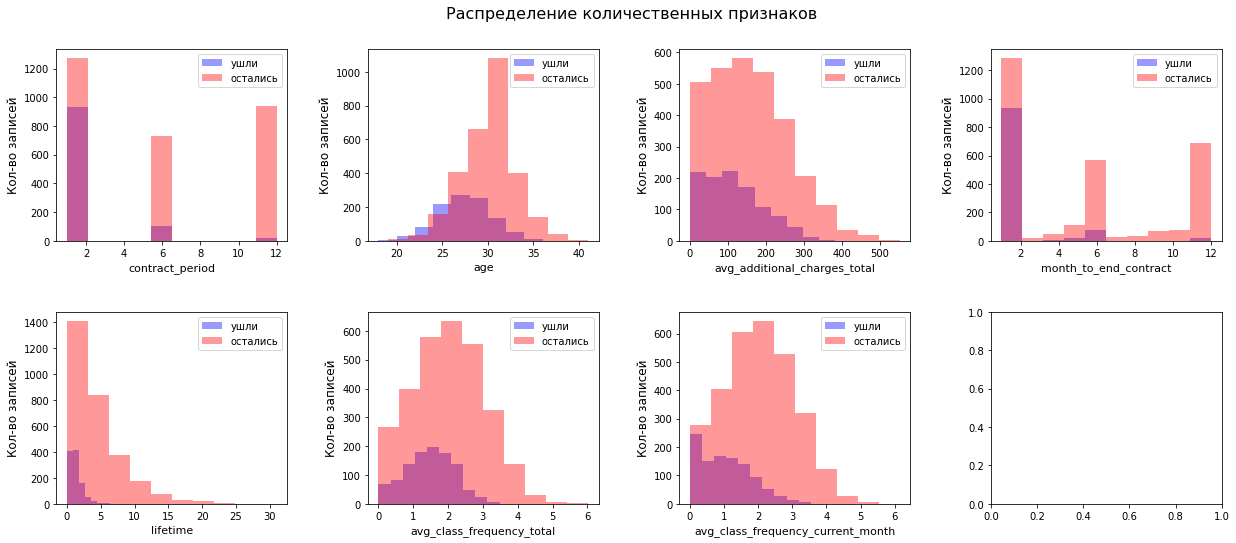

In [11]:
features_1 = ['contract_period', 'age', 'avg_additional_charges_total', 'month_to_end_contract', 'lifetime', 'avg_class_frequency_total', 'avg_class_frequency_current_month']
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(18,8))
axes_list = [item for sublist in axes for item in sublist]
fig.tight_layout(pad=5.0)
fig.suptitle('Распределение количественных признаков', fontsize=16)
for i in features_1:
    ax = axes_list.pop(0)
    sns.distplot(gym.query('churn == 1')[i], bins=10, ax=ax, kde=False, color='b',label='ушли')
    sns.distplot(gym.query('churn == 0')[i], bins=10, ax=ax, kde=False, color='r',label='остались')
    ax.set_xlabel(i, fontsize=11)
    ax.set_ylabel('Кол-во записей', fontsize=12)
    ax.legend()
plt.show()    

**1. Чем больше срок абонемента, тем меньше отток. Больше всего отток среди тех, у кого абонемент на месяц; 2. До возраста 25-26 лет большая часть склонна уйти, но дальше чем старше клиенты, тем склонность остаться выше (особенно в возрасте 30-33); 3. доли ушел/остался мало зависят от трат на дополнительные услуги; 4.  Чем больше времени осталось до окончания абонемента, тем желание клиентов продолжать ходить в фитнес сильнее, при этом основной отток идет среди тех, у кого осталься 1 месяц. 5. среди тех, у кого большой "lifetime" оттока почти нет, отток идет от тех кто ходил до 2 месяцев; 6. У тех кто ходит до 2 раз в неделю доли оттока примерно одинаковые, для ходящих 3 раза в неделю доля оставших велика , 4-5 раз оттока нет, но таких мало; 7.Чем чаще клиент ходит в клуб за последний месяц, тем меньше отток.**

#### Задача 4. Построение матрицы корреляций.
<a id="1_4"></a> 

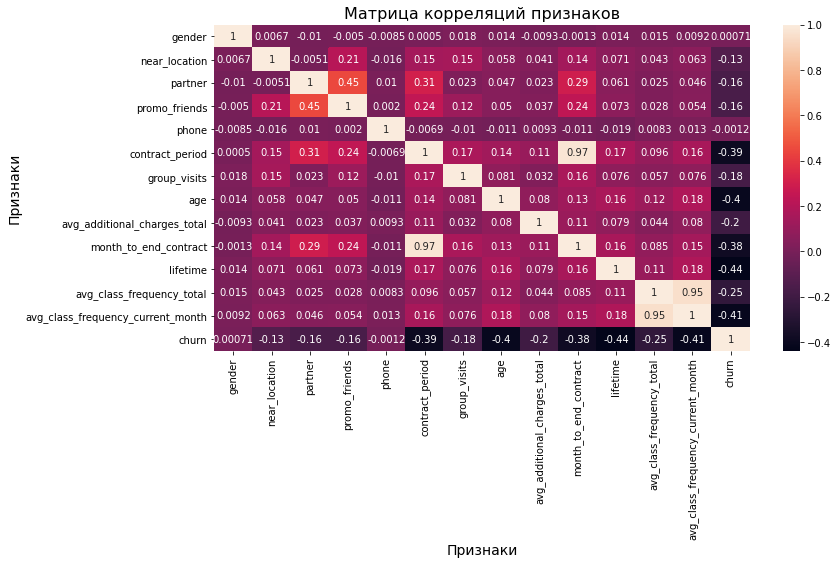

In [12]:
matr = gym.corr()
plt.figure(figsize=(12,6))
sns.heatmap(matr, annot = True, square=False)
plt.title('Матрица корреляций признаков', fontsize = 16)
plt.xlabel('Признаки', fontsize = 14) 
plt.ylabel('Признаки', fontsize = 14)
plt.show()

**Матрица показывает, что 'partner', 'group_visits', 'promo_friends' - оказывают очень слабое влияние, а 'age' наоборот более сильное. Между 'churn' и признаками видна обратная корреляция - это говорит о том, что чем сильнее признак, тем слабее отток.
По коэффициентам корреляции можно увидеть, что все признаки слабо коррелируют: 'gender' и 'phone' - корреляция приближена к 0,   
'near_location', 'partner', 'promo_friends', 'group_visits', 'avg_additional_charges_total', 'avg_class_frequency_total' - корреляция в диапазоне -(0,1-0,25) - очень слабая; 'contract_period', 'age', 'month_to_end_contract', 'lifetime', 'avg_class_frequency_current_month'- корреляция в диапазоне -(0,38-0,44) - слабая. Очень сильная (выше 0,95) корреляцию между признаками, которую надо будет учесть в моделях линейной регрессии: 1.'contract_period' и 'month_to_end_contract'- чем больше период абонемента, тем скорее всего больше месяцев осталось; 2.'avg_class_frequency_current_month' и 'avg_class_frequency_total' - здесь очень логично, те кто давно уже ходит с постоянным графиком, тот и за последний месяц ходил скорее всего с таким же графиком.**

**ВЫВОД:**
* 1. Дубликатов нет, среднее значение и медиана отличаются незначительно, что говорит о небольшом количестве выбросов.
* 2. В процессе исследования среднего значения признаков в двух группах (0-остался, 1-ушел) было выявлено их влияние на исход события: "ушел/остался": средние значения признаков 'gender', 'near_location', 'phone', 'age', 'avg_additional_charges_total' приблизительно равны, а следовательно данные признаки не имеют влияния на исход события. Что касается признаков 'partner', 'promo_friends', 'group_visits', 'avg_class_frequency_total' они имеют среднюю степень положительного влияния на клиентов (промо акции положительно влияют на заинтересованность клиентов, групповые визиты положительно влияют на социализацию и настроение клиетов, средняя посещаемость говорит о заинтересованности клиентов в занятиях). Наибольшее влияние на исход события оказывают признаки: 'contract_period', 'month_to_end_contract', 'lifetime', 'avg_class_frequency_current_month' - временные показатели (период действия абонемента, время до окончания абонемента, время с момента первого обращения, частота посещений за последний месяц - это все говорит также о заинтересованности клиентов в фитнес-услугах).
* 3. Распределение мужчин и женщин в датасете равное, также это распределение сохранилось и в группах (при этом и мужчин и женщин осталось в три раза больше, чем ушло); 2. Тех, кто живет ближе значительно больше, доля оставшихся при этом еще больше; 3. оставшихся среди участвовавших в партнерской программе больше; 4. участников промо-акции меньше, а вот доля оставшихся выше, чем среди неучаствовавших в акции. 5. оставивших телефон больше, но распределение долей ушел/остался среди оставивших и неоставивших телефон примерно одинаковое; 6. Среди тех, кто ходил на групповые занятия доля, тех кто хочет остаться выше.
* 4. Чем больше срок абонемента, тем меньше отток. Больше всего отток среди тех, у кого абонемент на месяц; 2. До возраста 25-26 лет большая часть склонна уйти, но дальше чем старше клиенты, тем склонность остаться выше (особенно в возрасте 30-33); 3. доли ушел/остался мало зависят от трат на дополнительные услуги; 4. Чем больше времени осталось до окончания абонемента, тем желание клиентов продолжать ходить в фитнес сильнее, при этом основной отток идет среди тех, у кого осталься 1 месяц. 5. среди тех, у кого большой "lifetime" оттока почти нет, отток идет от тех кто ходил до 2 месяцев; 6. У тех кто ходит до 2 раз в неделю доли оттока примерно одинаковые, для ходящих 3 раза в неделю доля оставших велика , 4-5 раз оттока нет, но таких мало; 7.Чем чаще клиент ходит в клуб за последний месяц, тем меньше отток.
* 5. Матрица показывает, что 'partner', 'group_visits', 'promo_friends' - оказывают очень слабое влияние, а 'age' наоборот более сильное. Между 'churn' и признаками видна обратная корреляция - это говорит о том, что чем сильнее признак, тем слабее отток. По коэффициентам корреляции можно увидеть, что все признаки слабо коррелируют: 'gender' и 'phone' - корреляция приближена к 0, 'near_location', 'partner', 'promo_friends', 'group_visits', 'avg_additional_charges_total', 'avg_class_frequency_total' - корреляция в диапазоне -(0,1-0,25) - очень слабая; 'contract_period', 'age', 'month_to_end_contract', 'lifetime', 'avg_class_frequency_current_month'- корреляция в диапазоне -(0,38-0,44) - слабая. Очень сильная (выше 0,95) корреляцию между признаками, которую надо будет учесть в моделях линейной регрессии: 1.'contract_period' и 'month_to_end_contract'- чем больше период абонемента, тем скорее всего больше месяцев осталось; 2.'avg_class_frequency_current_month' и 'avg_class_frequency_total' - здесь очень логично, те кто давно уже ходит с постоянным графиком, тот и за последний месяц ходил скорее всего с таким же графиком.

### ШАГ 3. ПОСТРОЕНИЕ МОДЕЛИ ПРОГНОЗИРОВАНИЯ ОТТОКА КЛИЕНТОВ (построение модели бинарной классификации клиентов, где целевой признак — факт оттока клиента в следующем месяце:)
<a id="part_3"></a> 

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, silhouette_score
from sklearn.ensemble import RandomForestClassifier
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans

from plotly import graph_objects as go

#### Задача 1. Разбиение данных на обучающую и валидационную выборку функцией train_test_split()
<a id="1"></a> 

In [14]:
X = gym.drop('churn', axis=1)
y = gym['churn'] 

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
#создадим объект класса StandardScaler и применим его к обучающей выборке
scaler = StandardScaler()
X_train_st = scaler.fit_transform(X_train) 
display(X_train_st[:5])
#применяем стандартизацию к матрице признаков для тестовой выборки
X_test_st = scaler.transform(X_test) 

array([[-1.01511421,  0.4175068 ,  1.03175391,  1.4800097 ,  0.31628211,
         1.60502986, -0.84769226,  0.57944798,  0.37161711,  1.59173796,
         1.12734972,  1.75580418,  1.61822807],
       [-1.01511421,  0.4175068 , -0.96922337, -0.67567125,  0.31628211,
        -0.81299073, -0.84769226,  0.27046055, -1.09697378, -0.79568246,
         5.88138322, -0.2239674 , -0.01340886],
       [ 0.98511083,  0.4175068 ,  1.03175391, -0.67567125,  0.31628211,
         1.60502986, -0.84769226, -0.65650171, -1.18374157,  1.83048   ,
         0.3350108 , -0.84308456, -0.80541199],
       [-1.01511421,  0.4175068 ,  1.03175391,  1.4800097 ,  0.31628211,
         0.28610954, -0.84769226, -0.96548914, -0.95158829,  0.39802775,
         1.39146269,  0.66771379,  0.64605224],
       [-1.01511421,  0.4175068 , -0.96922337, -0.67567125, -3.16173427,
        -0.81299073, -0.84769226, -0.03852687,  0.97190435, -0.79568246,
         0.07089783, -0.19587934, -0.16038147]])

#### Задача 2. Обучение модели на train-выборке логистической регрессией.
<a id="2"></a> 

In [16]:
def show_metrics(name, mdl):
    mdl.fit(X_train_st, y_train)
    y_pred = mdl.predict(X_test_st)
    print("Модель прогнозирования -", name)
    acc = accuracy_score(y_test, y_pred)
    print("Доля правильных ответов: Accuracy =",acc.round(3))
    precision = precision_score(y_test, y_pred).round(3)
    print("Точность: precision =", precision)
    recall = recall_score(y_test, y_pred).round(3)
    print("Полнота: recall =", recall, '\n')

model = LogisticRegression(random_state=0)
show_metrics('"Логистическая регрессия"', model)

Модель прогнозирования - "Логистическая регрессия"
Доля правильных ответов: Accuracy = 0.922
Точность: precision = 0.854
Полнота: recall = 0.828 



#### Задача 3. Обучение модели на train-выборке случайным лесом.
<a id="3"></a> 

In [17]:
model = RandomForestClassifier(n_estimators = 100, random_state=0)
show_metrics('"Случайный лес"', model)

Модель прогнозирования - "Случайный лес"
Доля правильных ответов: Accuracy = 0.915
Точность: precision = 0.839
Полнота: recall = 0.813 



#### Задача 4. Оценка метрики accuracy, precision и recall для обеих моделей на валидационной выборке. Сравнение по ним моделей. Выбор лучшей.
<a id="4"></a> 

**ВЫВОД:** По параметру accuracy "Логистическая регрессия" немного выигрывает у "Случайный лес" (0,922 против 0,915), по precision тоже "Логистическая регрессия" немного лучше (0,854 проитив 0,839) и также немного лучше по recall (0,828 против 0,813). Таким образом, по всем параметрам "Логистическая регрессия" дает результат немного лучше чем "Случайный лес", при этом, нужно отметить, что обе модели имеют высокие показатели accuracy, precision и recall.

### ШАГ 4. КЛАСТЕРИЗАЦИЯ КЛИЕНТОВ
<a id="part_4"></a> 

#### Задача 1. Стандартизация данных.
<a id="5"></a> 

In [18]:
sc = StandardScaler()
X_sc = sc.fit_transform(X)

#### Задача 2. Построение матрицы расстояний функцией linkage() на стандартизованной матрице признаков и отрисовка дендрограммы.  
<a id="6"></a> 

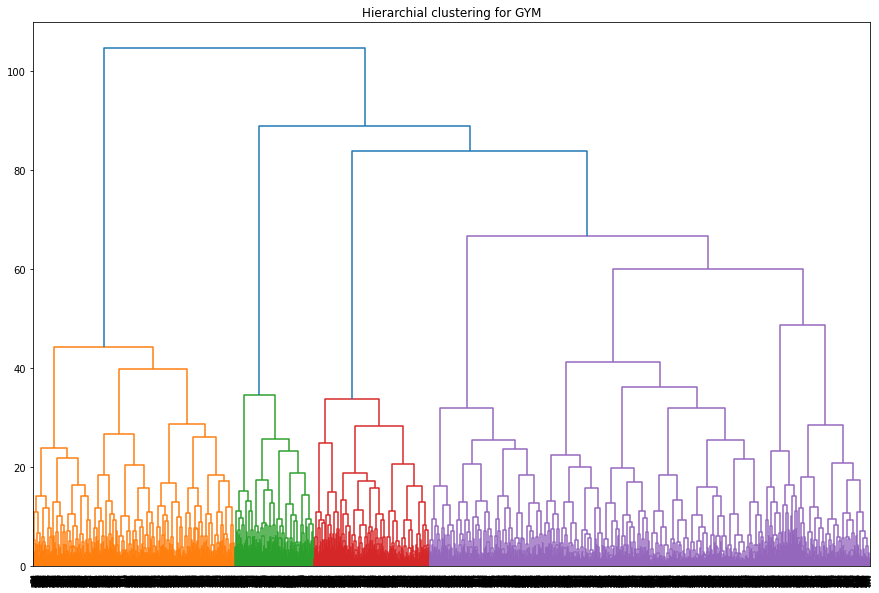

In [19]:
linked = linkage(X_sc, method = 'ward')
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Hierarchial clustering for GYM')
plt.show()

**Согласно построенной дендрограмме все данные можно разделить от 4 до 6 кластеров**

#### Задача 3. Обучение модели кластеризации на основании алгоритма K-Means и прогнозирование кластеров клиентов.
<a id="7"></a> 

In [20]:
km = KMeans(n_clusters = 5, random_state=0) # задаём число кластеров, равное 5
labels = km.fit_predict(X_sc) # применяем алгоритм к данным и формируем вектор кластеров

In [21]:
gym['cluster_km'] = labels

In [31]:
# сгуппируем клиентов по кластерам
gym.groupby(['cluster_km'])['gender'].count()

cluster_km
0    1010
1     385
2     505
3    1262
4     838
Name: gender, dtype: int64

**В кластерах количество клиентов различается от 385 до 1262**

In [23]:
# расчет метрики силуэта
print('Silhouette_score: {:.2f}'.format(silhouette_score(X_sc, labels)))

Silhouette_score: 0.14


**Кластерная структура выражена плохо, количество кластеров не в лучшей мере соответствует естественной группировке данных**

#### Задача 4. Изучение средних значений признаков для кластеров. Можно ли сразу что-то заметить?
<a id="8"></a> 

In [24]:
gym.drop('churn', axis=1).groupby('cluster_km').mean().T

cluster_km,0,1,2,3,4
gender,0.502970,0.522078,0.495050,0.485737,0.559666
near_location,0.959406,0.862338,0.000000,1.000000,0.976134
partner,0.783168,0.470130,0.463366,0.350238,0.356802
promo_friends,0.574257,0.306494,0.079208,0.240095,0.230310
phone,1.000000,0.000000,1.000000,1.000000,0.998807
contract_period,10.889109,4.787013,2.352475,1.948494,2.669451
group_visits,0.542574,0.425974,0.215842,0.341521,0.473747
age,29.982178,29.301299,28.477228,28.167987,30.125298
avg_additional_charges_total,160.761016,143.957664,135.457501,131.622204,161.657905
month_to_end_contract,9.954455,4.475325,2.198020,1.856577,2.459427


In [25]:
# расчет средних по признакам
gym.drop(['cluster_km', 'churn'], axis=1).mean()

gender                                 0.510250
near_location                          0.845250
partner                                0.486750
promo_friends                          0.308500
phone                                  0.903500
contract_period                        4.681250
group_visits                           0.412250
age                                   29.184250
avg_additional_charges_total         146.943728
month_to_end_contract                  4.322750
lifetime                               3.724750
avg_class_frequency_total              1.879020
avg_class_frequency_current_month      1.767052
dtype: float64

**Признаки кластеров:**
* **Кластер 0** (*клиенты, купившие абонемент на 12 мес по Промо -акции или Партнер-программе и проходившие еще немного.*): "partner" - высокий 78.3%, "promo_friends" - высокий 57.5%  "contract_period" - высокий 11 месяцев, "month_to_end_contract" - высокий - 10 месяцев
* **Кластер 1** (*не оставившие номер телефона*)
* **Кластер 2** (*клиенты, не близко живущие, среди которых большинство без промо-акции и мало склонные к групповым занятиям*): "near_location" = 0, "promo_friends" = 8%, "group_visits" = 21,6%
* **Кластер 3** (*клиенты, посещающие зал около 1 раза в неделю*):"avg_class_frequency_total" = 1,25, "avg_class_frequency_current_month" = 1,01
* **Кластер 4** (*любители фитнеса, посещают зал до 3 раз в неделю*):"avg_class_frequency_total" = 2,85, "avg_class_frequency_current_month" = 2,85

#### Задача 5. Построение распределений признаков для кластеров. Можно ли что-то заметить по ним?
<a id="9"></a> 

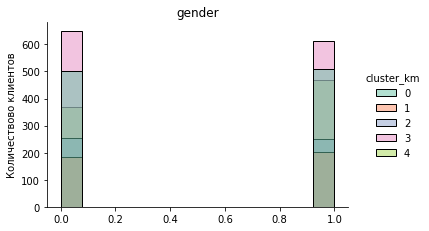

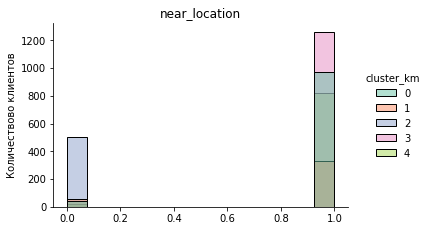

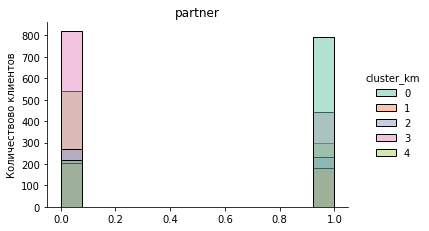

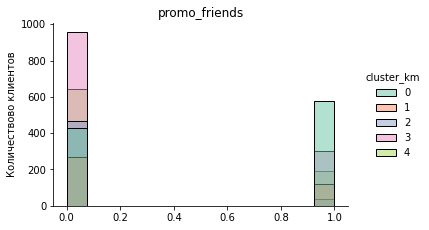

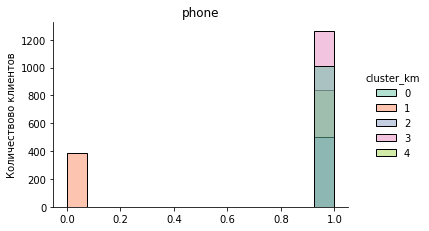

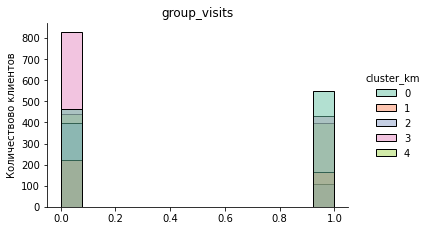

In [33]:
for i in features:
    g = sns.displot(gym, x=gym[i], hue='cluster_km', palette="Set2", kind='hist')
    plt.title(f'{i}')
    plt.ylabel("Количествово клиентов")
    plt.xlabel("")
    g.fig.set_figwidth(6)
    g.fig.set_figheight(3)
    g.fig.patch.set_linewidth(5)

**особенности кластеров:**

'gender' - нет ничего особенного
'near_location' - живущие неблизко (кластер 2)
'partner' - не партнеры (кластер 1 и 3), партнеры (кластер 0 и 4)
'promo_friends' - не промо (кластер 1 и 3), промо (кластер 0 и 4)
'phone' - не оставившие номера телефона (кластер 1)
'group_visits' - не любители групповых занятий (кластер 3), любители (кластер 0)

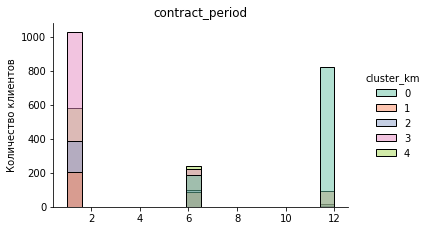

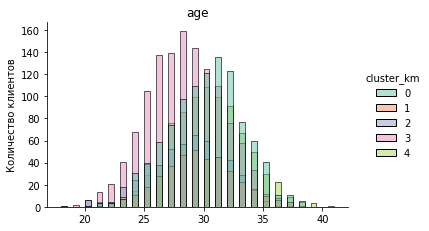

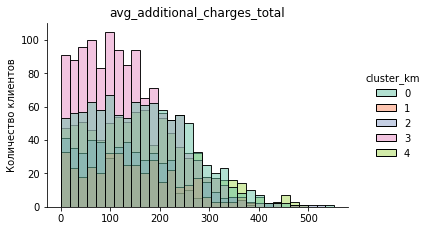

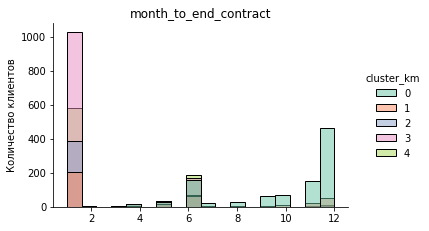

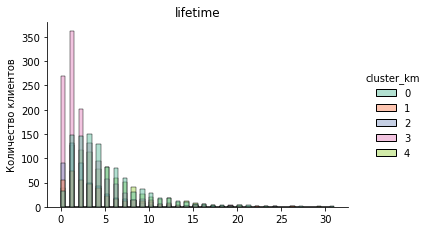

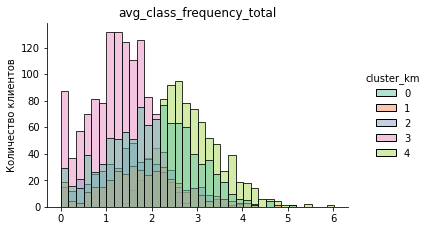

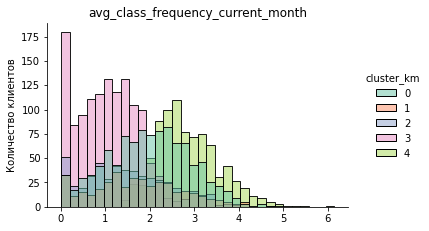

In [34]:
for i in features_1:
    g = sns.displot(gym, x=gym[i], hue='cluster_km', palette="Set2", kind='hist')
    plt.title(f'{i}')
    plt.ylabel("Количество клиентов")
    plt.xlabel("")
    g.fig.set_figwidth(6)
    g.fig.set_figheight(3)
    g.fig.patch.set_linewidth(5)

**особенности кластеров:**
'contract_period' - имеющие абонемент на 12 мес (кластер 0); 'age' - до 30 лет(кластер 3), после 30 лет (кластер 0); 'avg_additional_charges_total' - тратящие до 200 (кластер 3), свыше 200 (кластер 0); 'month_to_end_contract' - больше 6 мес осталось до окончания абонемента (кластер 0); 'lifetime' - ходили меньше 3 месяцев (кластер 3), больше 3 месяцев (кластер 0); 'avg_class_frequency_total' и 'avg_class_frequency_current_month ходят 1-2 раза в неделю (кластер 3), кластер 4 - больше 2 раз; 

#### Задача 6. Для каждого полученного кластера расчет доли оттока (методом groupby()). Отличаются ли они по доле оттока? Какие кластеры склонны к оттоку, а какие — надёжны?
<a id="10"></a> 

In [39]:
outflow = gym.query('churn==1').groupby('cluster_km')['churn'].count() / gym.query('churn==1')['churn'].count()
display(outflow*100)

cluster_km
0     2.639020
1     9.707823
2    21.112158
3    61.168709
4     5.372290
Name: churn, dtype: float64

**Наибольший отток  из 3 кластера (61,2%). Самый маленький отток из 0 (2,64%) и 4 (5,37%) кластеров. Во 2 кластере, отток составил 21,1% (скорее всего из-за того, что клиенты живут неблизко).**

**ВЫВОД:**
* 1. Согласно построенной дендрограмме все данные можно разделить от 4 до 6 кластеров.
* 2. Оценка разбивки на 5 кластеров показала, что кластерная структура выражена плохо, количество кластеров не в лучшей мере соответствует естественной группировке данных. В кластерах количество клиентов различается от 385 до 1262
* 3. Признаки кластеров:
  Кластер 0 (клиенты, купившие абонемент на 12 мес по Промо -акции или Партнер-программе и проходившие еще немного.): "partner" - высокий 78.3%, "promo_friends" - высокий 57.5% "contract_period" - высокий 11 месяцев, "month_to_end_contract" - высокий - 10 месяцев
  Кластер 1 (не оставившие номер телефона)
  Кластер 2 (клиенты, не близко живущие, среди которых большинство без промо-акции и мало склонные к групповым занятиям): "near_location" = 0, "promo_friends" = 8%, "group_visits" = 21,6%
  Кластер 3 (клиенты, посещающие зал около 1 раза в неделю):"avg_class_frequency_total" = 1,25, "avg_class_frequency_current_month" = 1,01
  Кластер 4 (любители фитнеса, посещают зал до 3 раз в неделю):"avg_class_frequency_total" = 2,85, "avg_class_frequency_current_month" = 2,85
* 4. Построение распределений признаков для кластеров показало: 'gender' - нет ничего особенного 'near_location' - живущие неблизко (кластер 2) 'partner' - не партнеры (кластер 1 и 3), партнеры (кластер 0 и 4) 'promo_friends' - не промо (кластер 1 и 3), промо (кластер 0 и 4) 'phone' - не оставившие номера телефона (кластер 1) 'group_visits' - не любители групповых занятий (кластер 3), любители (кластер 0), 'contract_period' - имеющие абонемент на 12 мес (кластер 0); 'age' - до 30 лет(кластер 3), после 30 лет (кластер 0); 'avg_additional_charges_total' - тратящие до 200 (кластер 3), свыше 200 (кластер 0); 'month_to_end_contract' - больше 6 мес осталось до окончания абонемента (кластер 0); 'lifetime' - ходили меньше 3 месяцев (кластер 3), больше 3 месяцев (кластер 0); 'avg_class_frequency_total' и 'avg_class_frequency_current_month ходят 1-2 раза в неделю (кластер 3), кластер 4 - больше 2 раз;
* 5. Наибольший отток из 3 кластера (61,2%). Самый маленький отток из 0 (2,64%) и 4 (5,37%) кластеров. Во 2 кластере, отток составил 21,1% (скорее всего из-за того, что клиенты живут неблизко).

### ШАГ 5. ВЫВОДЫ И БАЗОВЫЕ РЕКОМЕНДАЦИИ ПО РАБОТЕ С КЛИЕНТАМИ
<a id="part_5"></a> 

**ВЫВОДЫ:**

*Характеристики кластеров*
* Кластер 0 (1010 человек) - отток всего 2,64 %: (срок абонемента 12 мес, используют Промо-акцию или Партнер-программу, проходили  больше 2 месяцев, ходят 2-3 раза в неделю, им больше 30 лет, тратят на допуслуги свыше 200,  осталось 6 мес и больше от абонемента, любят групповые занятия)

* Кластер 1 (385) - доля оттока около 10 %: не оставившие телефон

* Кластер 2 (505)- доля оттока 21,1%: (живут не близко, пришли без промо-акции, мало склонны к групповым занятиям)

* Кластер 3 (1262) - доля оттока 61,2%:(посещают 1 раз в неделю, проходили 2 месяца и менее, 30 лет и меньше, траты на допуслуги до 200, не является партнерами и без промо-акций, не любят групповые занятия)

* Кластер 4 (838) - доля оттока 5,37% :(любят фитнес, ходят примерно 3 раз в неделю и больше)

**БАЗОВЫЕ РЕКОМЕНДАЦИИ**:
* Необходимо больше партнерский программ, промо-акций, бонусных программ, которые уменьшили бы стоимость долгосрочного абонемента;
* Повышать заинтересованность в фитнесе с помощью расширения направлений занятий;
* Для клиентов кластера 3 (тем, кому до 30 предлагать бонусные программы, чтобы сократить долю оттока)